In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#!pip install pyramid.arima

In [4]:
train=pd.read_csv('DailyDelhiClimateTrain.csv')
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

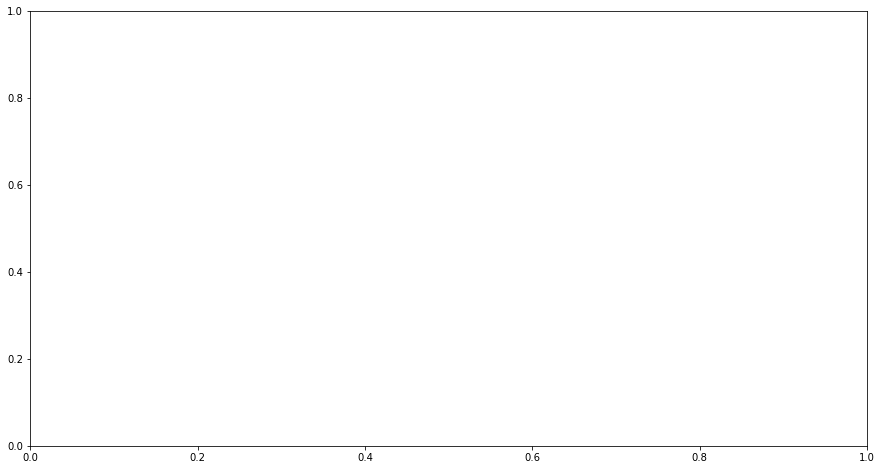

In [5]:
# Visualize the data
plt.figure(figsize=(15, 8))
plt.plot(train['date'], train['meantemp'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Gold Closing Prices Over Time')
plt.legend()
plt.show()

In [6]:
import numpy as np
# Tính chuỗi return
r_t = np.log(train['meantemp']/train['meantemp'].shift(1)).values


In [7]:
mean = np.nanmean(r_t)
r_t[0]=mean
r_t[:5]

array([-9.11887495e-19, -3.01105093e-01, -3.20393537e-02,  1.90043603e-01,
       -3.67724780e-01])

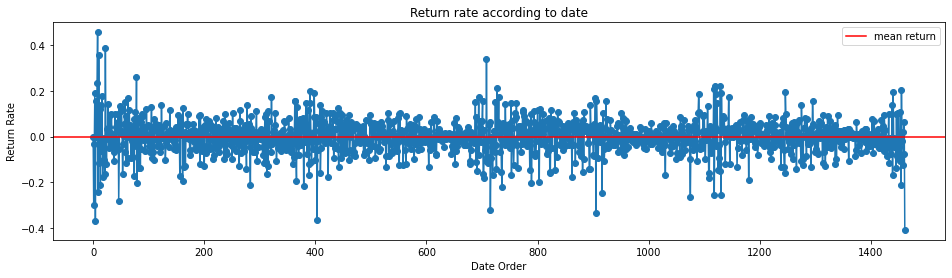

In [8]:
plt.figure(figsize=(16, 4))
plt.plot(np.arange(r_t.shape[0]), r_t, '-o')
plt.axhline(y=mean, label='mean return', c='red')
plt.title('Return rate according to date')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()
plt.show()

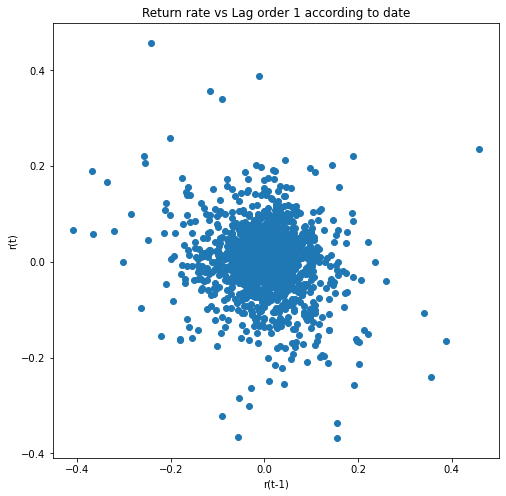

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(x=r_t[1:], y=r_t[:-1])
plt.title('Return rate vs Lag order 1 according to date')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')
plt.show()

In [10]:
!pip install --upgrade scipy statsmodels

Requirement already up-to-date: scipy in c:\users\admin\anaconda3\lib\site-packages (1.10.1)
Requirement already up-to-date: statsmodels in c:\users\admin\anaconda3\lib\site-packages (0.14.1)


In [11]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(r_t)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -21.106675
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model (replace order with the desired (p, d, q))
model_arima = ARIMA(r_t, order=(2, 0, 2))
model_fit = model_arima.fit()

# Print the summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:                 ARIMA(2, 0, 2)   Log Likelihood                1747.977
Date:                Sat, 05 Oct 2024   AIC                          -3483.953
Time:                        15:34:33   BIC                          -3452.228
Sample:                             0   HQIC                         -3472.119
                               - 1462                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.001      0.185      0.853      -0.002       0.002
ar.L1         -0.2737      0.103     -2.645      0.008      -0.476      -0.071
ar.L2          0.5430      0.056      9.719      0.0


Predicted future values:
 [ 9.18003899e-02  4.19653594e-02  3.84980712e-02  1.23886512e-02
  1.76512738e-02  2.03478317e-03  9.16583581e-03 -1.26476477e-03
  5.46157347e-03 -2.04255457e-03  3.66317045e-03 -1.97270279e-03
  2.66759852e-03 -1.66232393e-03  2.04210593e-03 -1.32262657e-03
  1.60952719e-03 -1.01980413e-03  1.29178378e-03 -7.68429511e-04
  1.05047046e-03 -5.65905029e-04  8.64023952e-04 -4.04919164e-04
  7.18735405e-04 -2.77750453e-04  6.05048415e-04 -1.77591223e-04
  5.15911248e-04 -9.88153948e-05  4.45955455e-04 -3.68990938e-05
  3.91028177e-04  1.17504386e-05  3.47891380e-04  4.99700507e-05
  3.14010604e-04  7.99936204e-05  2.87398416e-04  1.03577937e-04
  2.66494954e-04  1.22103742e-04  2.50075418e-04  1.36655901e-04
  2.37177908e-04  1.48086687e-04  2.27046914e-04  1.57065605e-04
  2.19089010e-04  1.64118567e-04  2.12838065e-04  1.69658684e-04
  2.07927938e-04  1.74010456e-04  2.04071024e-04  1.77428782e-04
  2.01041412e-04  1.80113882e-04  1.98661646e-04  1.82223034e-0

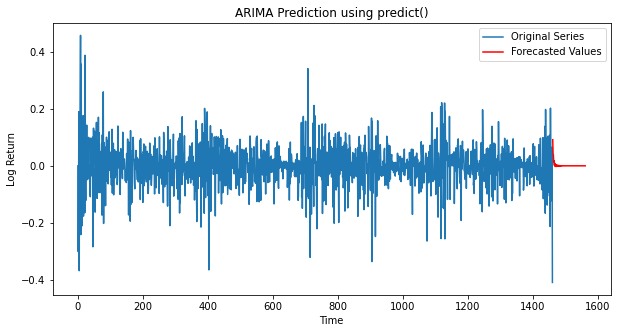

In [21]:
n_pred_perious = 100
# Define the range for prediction: from start to future steps
start = len(r_t)  # start from the last data point
end = start + n_pred_perious  # predict 10 future steps

predicted_values = model_fit.predict(start=start, end=end)

# Display predicted values
print("\nPredicted future values:\n", predicted_values)

# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(r_t)), r_t, label="Original Series")
plt.plot(np.arange(len(r_t), len(r_t) + n_pred_perious + 1), predicted_values, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()

In [22]:
# Assuming the first known value in meantemp is the first element
original_meantemp = np.zeros(len(predicted_values) + 1)

# The first value of the original series is known
original_meantemp[0] = train['meantemp'].iloc[0]

# Reverse the log returns to reconstruct the original series
for t in range(1, len(original_meantemp)):
    original_meantemp[t] = original_meantemp[t-1] * np.exp(predicted_values[t-1])

# Convert back to a pandas Series for easier handling
original_meantemp_series = pd.Series(original_meantemp, name='Reconstructed Meantemp')

# Display the first few reconstructed values
print(original_meantemp_series.head())

0    10.000000
1    10.961460
2    11.431250
3    11.879912
4    12.028004
Name: Reconstructed Meantemp, dtype: float64


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

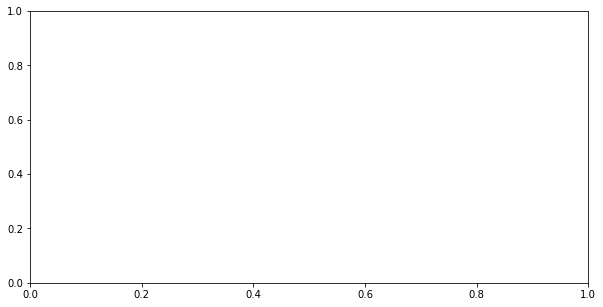

In [28]:
# Plot the original data and the forecast
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train)), train['meantemp'], label="Original Series")
plt.plot(np.arange(len(train), len(train) + len(original_meantemp_series) + 1), original_meantemp_series, label="Forecasted Values", color='red')
plt.title('ARIMA Prediction using predict()')
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.legend()
plt.show()